In [2]:
import json
import requests
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

from nbastats import team_stats

In [2]:
years = ['{}-{}'.format(y, str(y+1)[-2:]) for y in np.arange(2016, 1982, -1)]

In [3]:
df = team_stats('2017-18')
df['year'] = '2017-18'
for year in years:
    d = team_stats(year)
    d['year'] = year
    df = df.append(d, ignore_index=True)

In [16]:
df.to_csv('1983-2017.csv')

In [3]:
df = pd.read_csv('1983-2017.csv')

In [4]:
desc = df.groupby('GP').describe()

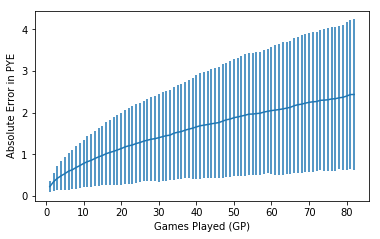

In [5]:
fig = plt.figure(figsize=(6,3.5))
plt.errorbar(np.arange(1, 83, 1), desc['PYE_WINS_ERROR_ABS']['mean'], yerr=desc['PYE_WINS_ERROR_ABS']['std'])
plt.xlabel('Games Played (GP)')
plt.ylabel('Absolute Error in PYE')
plt.show()

In [6]:
fig.savefig('pye-error.png', format='png', dpi=300, bbox_inches="tight")

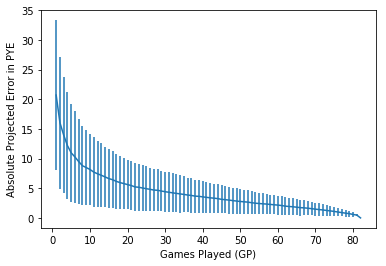

In [21]:
fig = plt.figure(figsize=(6,3.5))
plt.errorbar(np.arange(1, 83, 1), desc['PYE_PROJ_ERROR_ABS']['mean'], yerr=desc['PYE_PROJ_ERROR_ABS']['std'])
plt.xlabel('Games Played (GP)')
plt.ylabel('Absolute Projected Error in PYE')
plt.show()

In [19]:
pye_proj_mean = desc['PYE_PROJ_ERROR_ABS']['mean']
pye_proj_mean[pye_proj_mean<2.5]

GP
54    2.483557
55    2.430215
56    2.379337
57    2.337901
58    2.275539
59    2.215569
60    2.164037
61    2.085745
62    1.987664
63    1.924287
64    1.881272
65    1.808664
66    1.732705
67    1.697335
68    1.636248
69    1.559094
70    1.476704
71    1.406186
72    1.339929
73    1.255777
74    1.179530
75    1.093258
76    0.993735
77    0.899464
78    0.802965
79    0.721844
80    0.583801
81    0.478982
82    0.000000
Name: mean, dtype: float64